In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [4]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding = 'unicode_escape')  # Reading the data.
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
df.info()  # Datatypes of all the parameters.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
df.describe() # Five point Summary of all the numerical columns

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [7]:
num_cols = list(df.select_dtypes(np.number).columns) # List of numerical columns
cat_cols = list(df.select_dtypes(np.object).columns) # List of categorical columns

In [8]:
print('No.of Numerical Columns:',len(num_cols))
print('No.of Categorical Columns:',len(cat_cols))

No.of Numerical Columns: 29
No.of Categorical Columns: 24


In [9]:
df.isnull().sum()   # Count of null values

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [10]:
df = df.drop(['Order Zipcode','Product Description','Customer Zipcode','Customer Fname','Customer Lname',
              'Customer Email','Customer Password','Latitude','Longitude','Product Image','Customer Street',
             'Order Profit Per Order'],axis = 1)
# Customer Email and Customer Password was having encoded characters.
# Order Zipcode and Product Description were blank columns
# Product Image was having hyperlink.
# Order Profit Per Order was same as Benefit per order.
# Customer Street, Customer Names were not needed for analysis as we are having customer Ids
# Latitude and Longitude were also not needed for analysis.

In [11]:
df.shape

(180519, 41)

# Exploratory Data Analysis

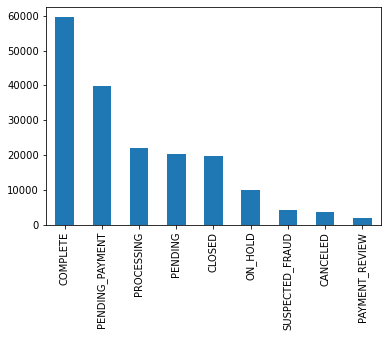

In [12]:
df['Order Status'].value_counts().plot(kind = 'bar')  # Univariate analysis of target
plt.show()

In [13]:
#Checking type of payment used to conduct fraud other than Transfer
x1 = df[(df['Type'] != 'TRANSFER')&(df['Order Status'] == 'SUSPECTED_FRAUD')]
x1['Order Region'].value_counts()

Series([], Name: Order Region, dtype: int64)

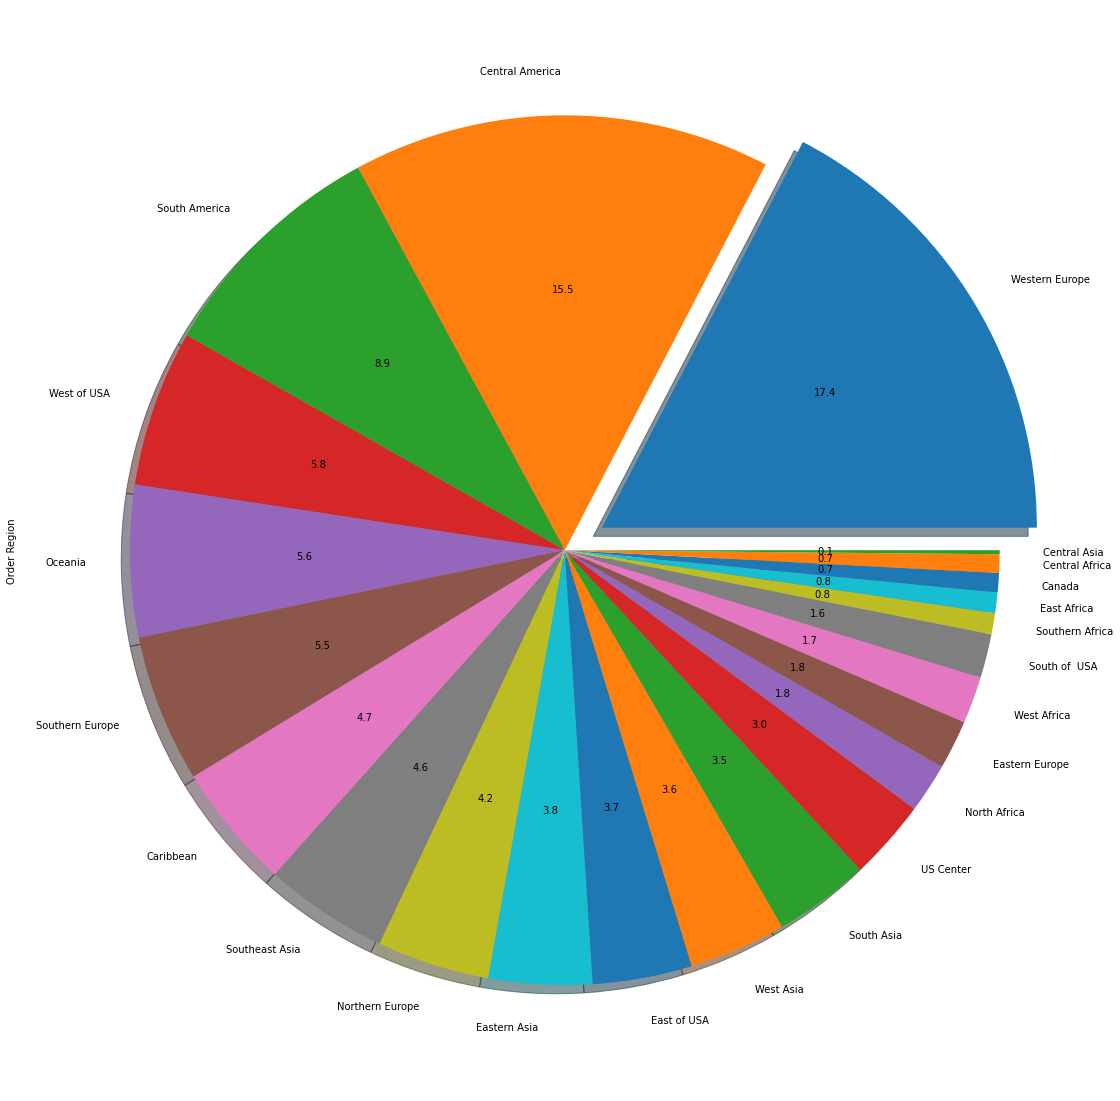

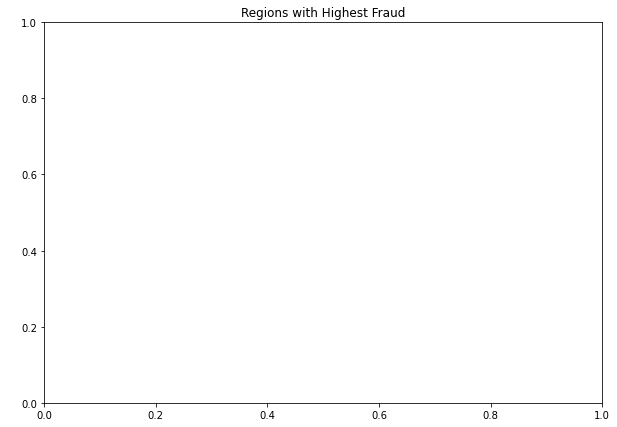

In [15]:
high_fraud = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')] #separating orders with suspected fraud

#Plotting pie chart with respect to order region
fraud = high_fraud['Order Region'].value_counts().plot.pie(figsize=(24,20),
explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),autopct='%.1f',shadow=True,)
plt.figure(figsize=(10,7))
plt.title("Regions with Highest Fraud") # Plotting title
plt.ylabel(" ")
plt.show()

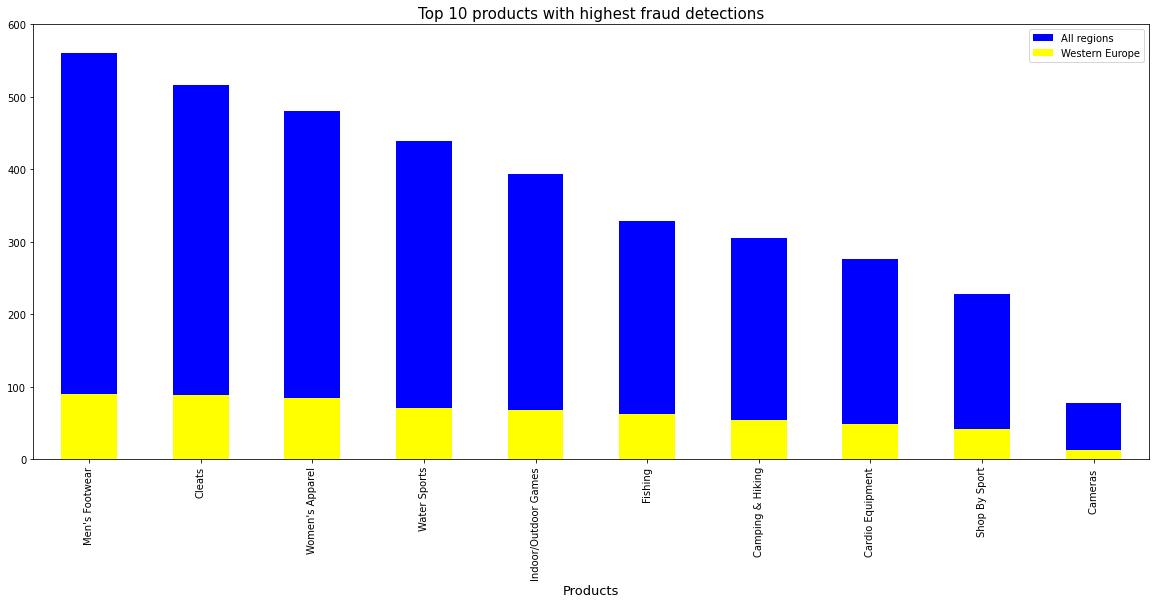

In [13]:
high_fraud1 = df[(df['Order Status'] == 'SUSPECTED_FRAUD')] # 
high_fraud2 = df[(df['Order Status'] == 'SUSPECTED_FRAUD') &(df['Order Region'] == 'Western Europe')]
#Plotting bar chart for top 10 most suspected fraud department in all regions
fraud1=high_fraud1['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud Category",color='blue')
#Plotting bar chart for top 10 most suspected fraud department in Western Europe
fraud2=high_fraud2['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Fraud product in Western Europe",color='yellow')
plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.ylim(0,600)
plt.show()

<AxesSubplot:title={'center':'Top 10 Highest Fraud Customers'}>

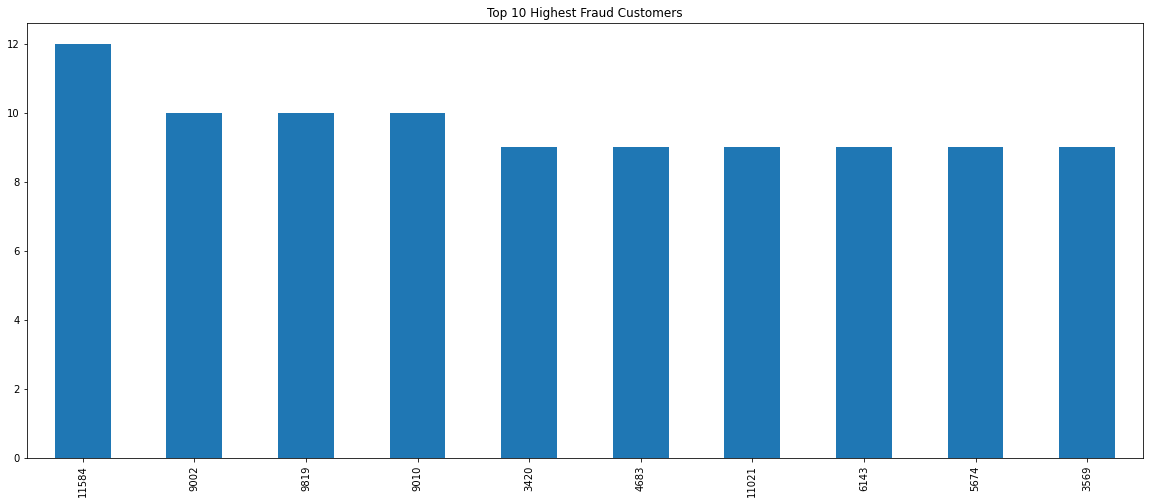

In [14]:
#Top 10 customers with most fraud

cust = df[(df['Order Status'] == 'SUSPECTED_FRAUD')] 
cust['Customer Id'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 Highest Fraud Customers")

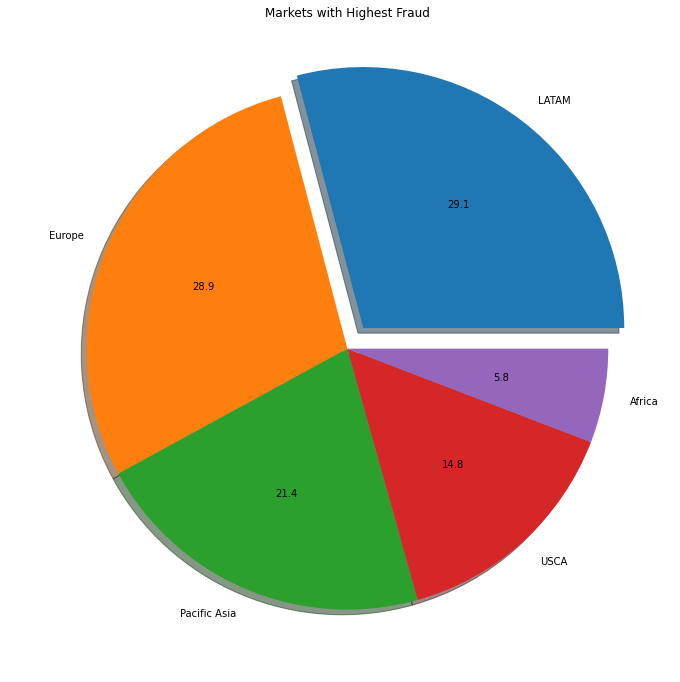

In [15]:
high_fraud1 = df[(df['Order Status'] == 'SUSPECTED_FRAUD') & (df['Type'] == 'TRANSFER')] #separating orders with suspected fraud

#Plotting pie chart with respect to order region
fraud = high_fraud['Market'].value_counts().plot.pie(figsize=(24,12),
explode=(0.1,0,0,0,0),autopct='%.1f',shadow=True,)
plt.title("Markets with Highest Fraud") # Plotting title
plt.ylabel(" ")
plt.show()

# Outlier Treatment

In [16]:
num_cols.remove('Latitude')
num_cols.remove('Longitude')
num_cols.remove('Customer Zipcode')
num_cols.remove('Order Profit Per Order')

In [17]:
num_cols.remove('Order Zipcode')
num_cols.remove('Product Description')

In [18]:
num_cols.remove('Product Status')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


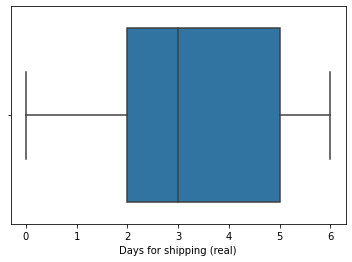

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


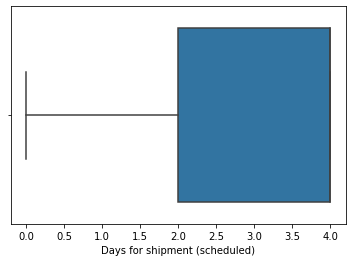

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


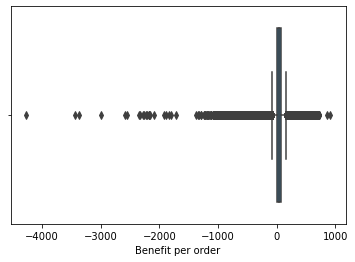

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


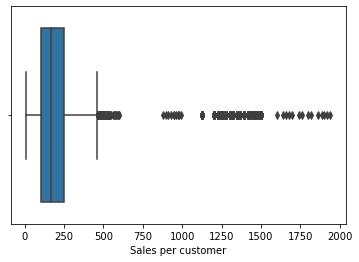

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


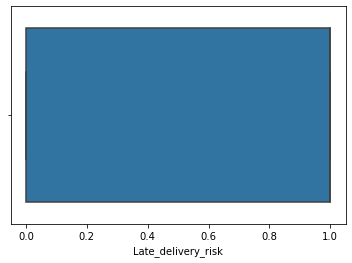

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


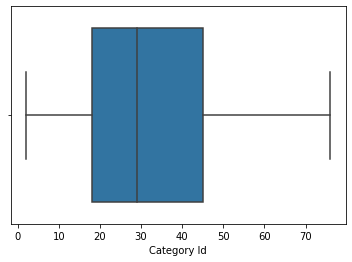

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


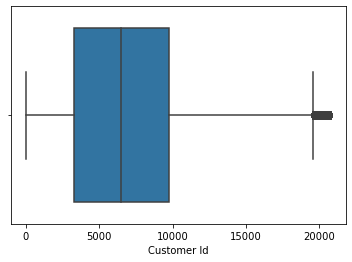

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


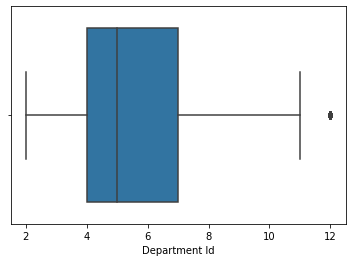

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


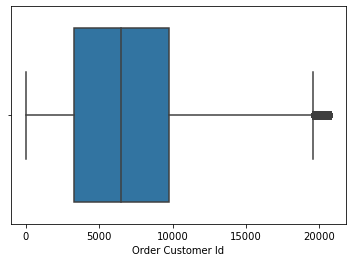

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


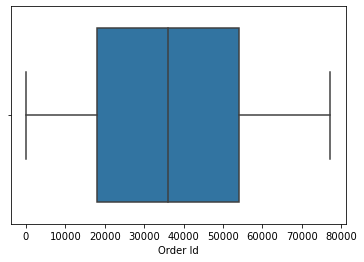

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


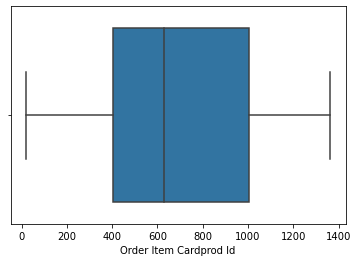

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


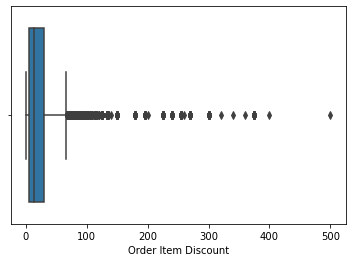

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


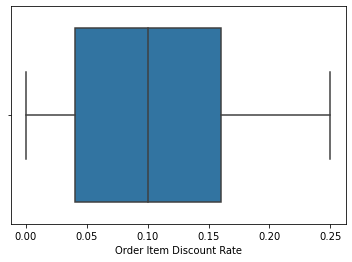

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


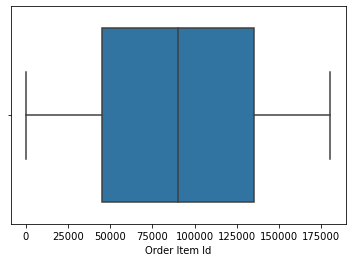

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


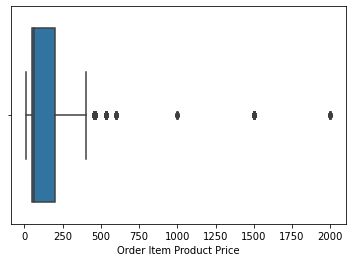

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


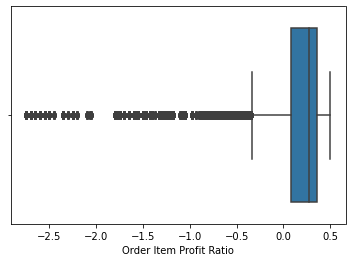

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


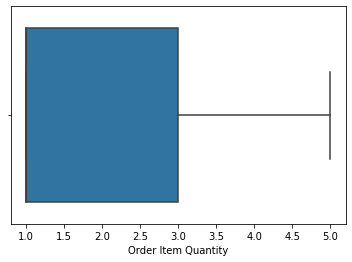

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


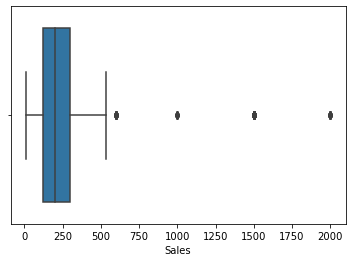

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


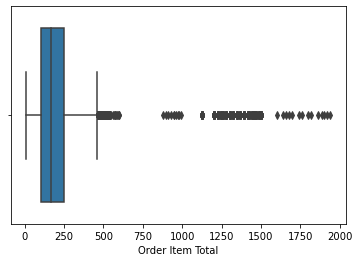

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


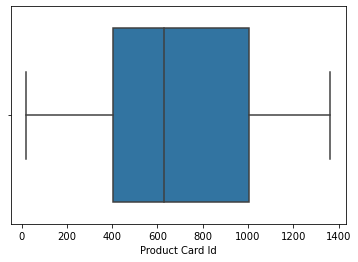

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


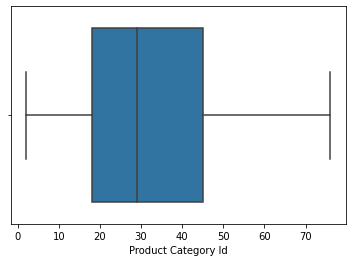

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


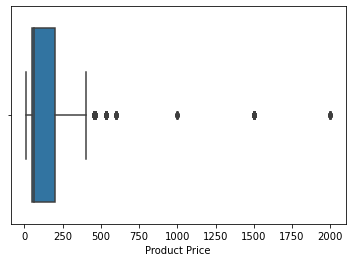

In [19]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

In [20]:
# Benefit per order, Sales per Customer, Customer Id, Order Customer Id, Order Item Discount, Order Item Product Price,
# Order Item Profit Ratio, Sales, Order Item Total, Product Price are having outliers.

In [21]:
df = df.drop(['Product Status','Late_delivery_risk'], axis = 1) # After outlier analysis.
# Product Status was the column with zeroes  only
# Late delivery risk was an encoded categorical column stored as numerical column.

In [22]:
df = df.drop('Order Customer Id', axis = 1)  # Same like Customer Id with exact data

In [23]:
num_cols.remove('Late_delivery_risk')
num_cols.remove('Order Customer Id')

In [24]:
cat_cols.remove('Customer Fname')
cat_cols.remove('Customer Lname')
cat_cols.remove('Product Image')
cat_cols.remove('Customer Email')
cat_cols.remove('Customer Password')
cat_cols.remove('Customer Street')

In [25]:
# Multicollinearity Check

In [26]:
df.corr()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Customer Id,Department Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Card Id,Product Category Id,Product Price
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,-0.000348,0.003432,-0.001631,-0.001711,-0.000859,0.002231,0.001467,-0.001769,0.002185,-0.004638,-0.000811,0.001962,0.001757,-0.000859,-0.000348,0.002185
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.000367,0.000899,-0.000262,-0.001878,-0.000431,0.002897,0.000065,-0.001848,0.006912,-0.001822,-0.002925,0.006327,0.006445,-0.000431,-0.000367,0.006912
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,0.031889,0.009354,0.031442,0.013716,0.033161,0.064756,-0.018644,0.013556,0.103459,0.823689,0.015696,0.131816,0.133484,0.033161,0.031889,0.103459
Sales per customer,0.001757,0.006445,0.133484,1.000000,0.225201,0.060181,0.232367,0.079000,0.236367,0.498734,-0.119469,0.078176,0.781781,-0.001439,0.105413,0.989744,1.000000,0.236367,0.225201,0.781781
Category Id,-0.000348,-0.000367,0.031889,0.225201,1.000000,0.274633,0.888835,0.198496,0.991092,0.140180,0.000572,0.186796,0.461059,-0.001614,-0.302408,0.227483,0.225201,0.991092,1.000000,0.461059
Customer Id,0.003432,0.000899,0.009354,0.060181,0.274633,1.000000,0.136897,0.204821,0.228039,0.038490,0.001712,0.191814,0.111118,-0.000337,-0.091328,0.060961,0.060181,0.228039,0.274633,0.111118
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.888835,0.136897,1.000000,0.106757,0.906117,0.144617,0.000255,0.101676,0.446743,-0.003044,-0.265437,0.234718,0.232367,0.906117,0.888835,0.446743
Order Id,-0.001711,-0.001878,0.013716,0.079000,0.198496,0.204821,0.106757,1.000000,0.163416,0.049385,0.000484,0.999623,0.115324,0.002760,-0.087073,0.079835,0.079000,0.163416,0.198496,0.115324
Order Item Cardprod Id,-0.000859,-0.000431,0.033161,0.236367,0.991092,0.228039,0.906117,0.163416,1.000000,0.147294,0.000731,0.154077,0.480288,-0.001784,-0.312555,0.238789,0.236367,1.000000,0.991092,0.480288
Order Item Discount,0.002231,0.002897,0.064756,0.498734,0.140180,0.038490,0.144617,0.049385,0.147294,1.000000,0.659955,0.048866,0.488101,-0.002788,0.065379,0.617438,0.498734,0.147294,0.140180,0.488101


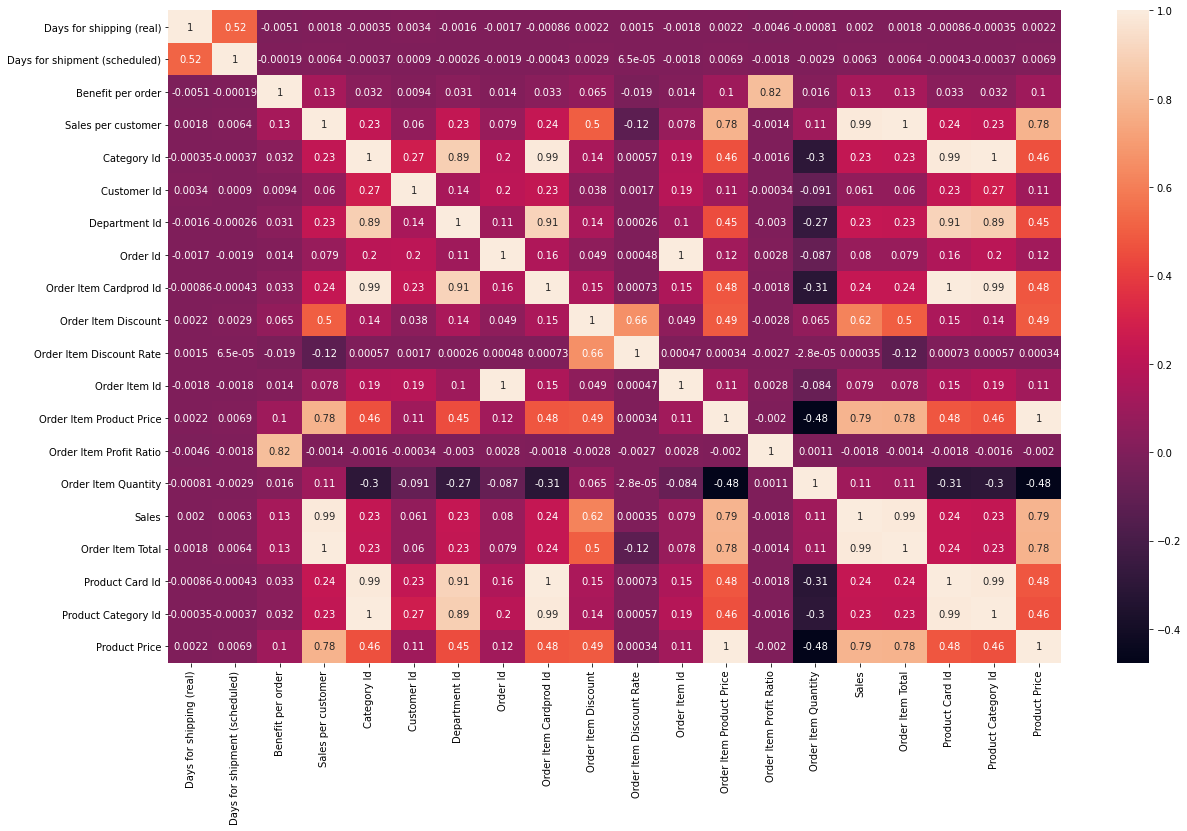

In [27]:
plt.rcParams['figure.figsize'] = [20,12]
sns.heatmap(df.corr(), annot= True)
plt.show()

In [28]:
# We can see there is a presence of multicollinearity

In [29]:
len(num_cols)

20

In [30]:
len(cat_cols)

18

# Distrbution of Variables

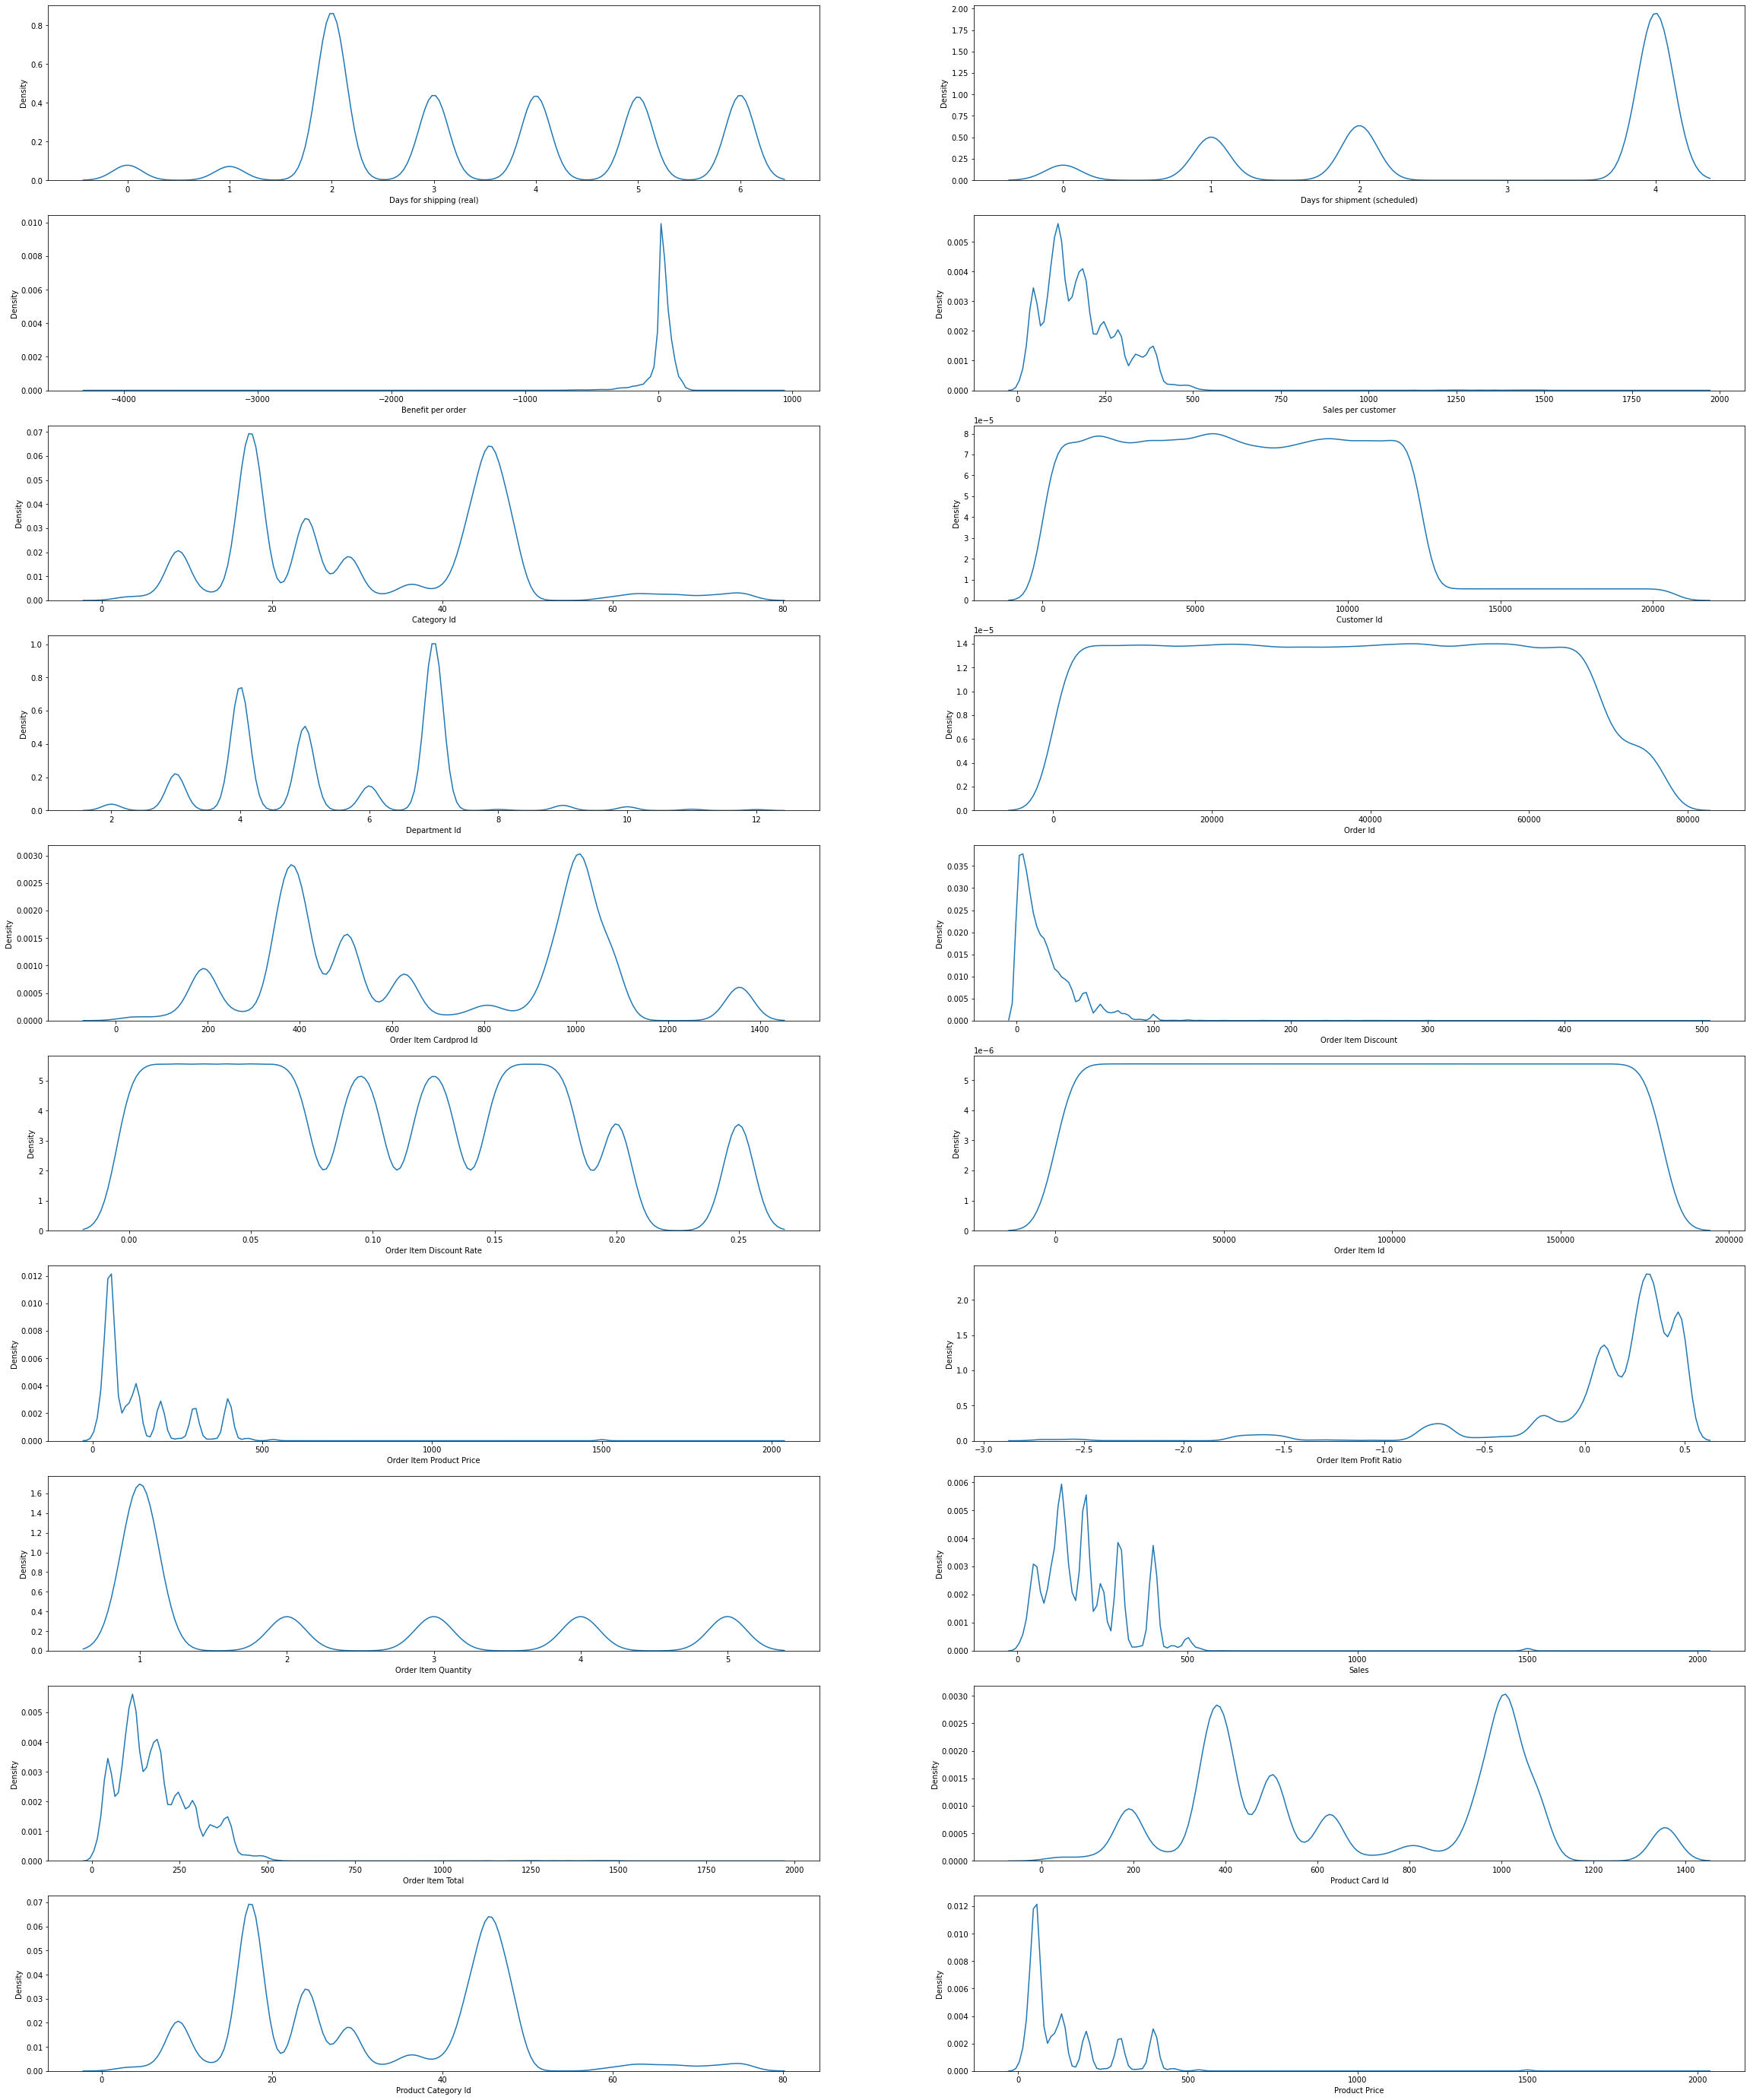

In [31]:
q = 1
plt.figure(figsize = (40,50))
plt.grid()
for i in num_cols:
    plt.subplot(10,2,q)
    sns.kdeplot(df[i])
    q+=1
plt.show()

# Statistical Significance

In [32]:
from scipy import stats

In [33]:
df['fraud'] = np.where(df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)  # Now, fraud becomes the target column.
# Converted it to binary classification

In [34]:
df = df.drop('Order Status', axis = 1)

In [35]:
cat_cols.remove('Order Status')

In [36]:
for i in cat_cols:                         # Statistical significance test for categorical columns
    ct=pd.crosstab(df[i],df['fraud'])
    print('p value for column:',i,':',stats.chi2_contingency(ct)[1])

p value for column: Type : 0.0
p value for column: Delivery Status : 0.0
p value for column: Category Name : 0.722756766656929
p value for column: Customer City : 3.84005955363135e-157
p value for column: Customer Country : 0.0043149927839307295
p value for column: Customer Segment : 0.0006840787359301104
p value for column: Customer State : 8.582620498747587e-11
p value for column: Department Name : 0.9687137361897139
p value for column: Market : 0.062336109666202545
p value for column: Order City : 0.0
p value for column: Order Country : 2.1962143921929054e-36
p value for column: order date (DateOrders) : 0.0
p value for column: Order Region : 5.097832591336198e-09
p value for column: Order State : 0.0
p value for column: Product Name : 0.8136553665199319
p value for column: shipping date (DateOrders) : 0.0
p value for column: Shipping Mode : 0.03737290804174167


In [37]:
for i in num_cols:        # Statistical significance test for numerical columns
    print('p value for column:',i,':',stats.ttest_ind(df[df['fraud']==1][i],df[df['fraud']==0][i])[1])

p value for column: Days for shipping (real) : 0.8875301449393683
p value for column: Days for shipment (scheduled) : 0.28208032353745677
p value for column: Benefit per order : 0.5306970894045245
p value for column: Sales per customer : 0.7620103443655895
p value for column: Category Id : 0.49237954210421364
p value for column: Customer Id : 6.65326461943043e-05
p value for column: Department Id : 0.5181855014730359
p value for column: Order Id : 0.3406781823347087
p value for column: Order Item Cardprod Id : 0.5619027377252022
p value for column: Order Item Discount : 0.7139450676307028
p value for column: Order Item Discount Rate : 0.30580772812974344
p value for column: Order Item Id : 0.3260184531064966
p value for column: Order Item Product Price : 0.8573626313851704
p value for column: Order Item Profit Ratio : 0.31008474821160636
p value for column: Order Item Quantity : 0.7476769178204016
p value for column: Sales : 0.8302077566837589
p value for column: Order Item Total : 0.7

In [38]:
cat_cols.remove('Customer City')
cat_cols.remove('Customer State')
cat_cols.remove('Order Country')
cat_cols.remove('Order Region')

In [39]:
num_cols.remove('Customer Id')

In [40]:
df = df.drop(['Customer City','Customer State','Order Country','Order Region','Customer Id'], axis = 1)

In [41]:
df.shape

(180519, 33)

# Class Imbalance

In [42]:
df['fraud'].value_counts()

0    176457
1      4062
Name: fraud, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='count'>

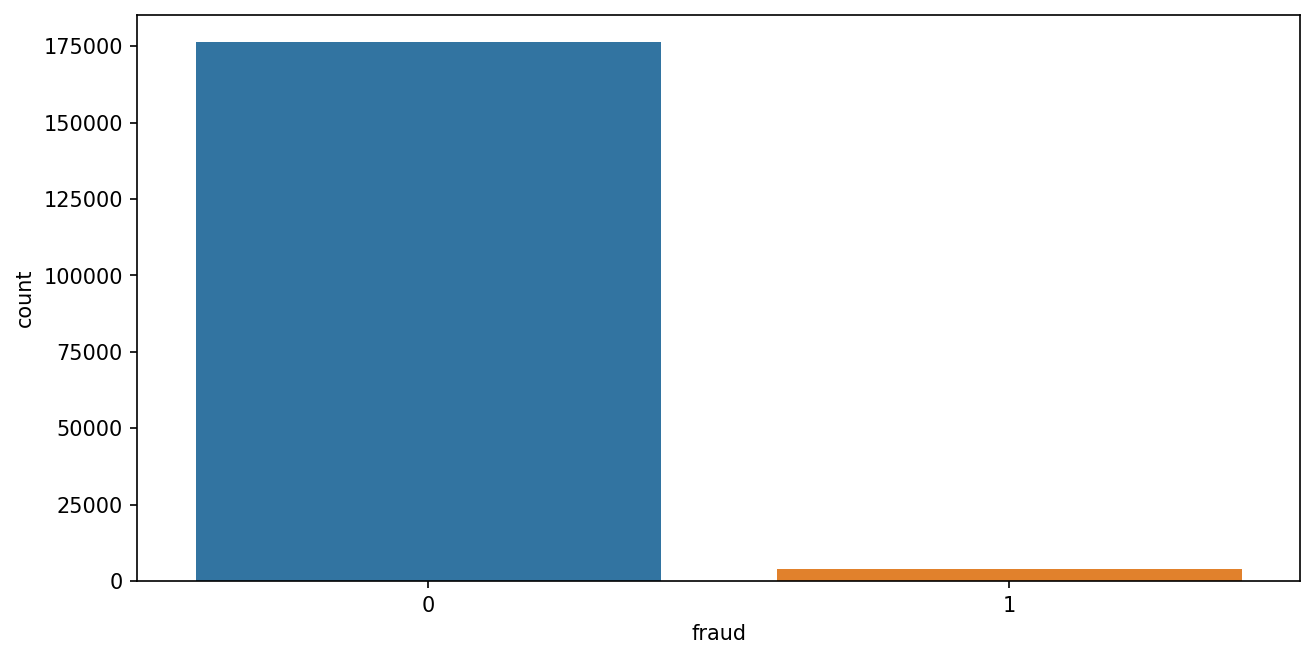

In [43]:
plt.figure(figsize=(10,5),dpi=150)
sns.countplot(df['fraud'])

# Transformation

In [44]:
for i in num_cols:
    print('Skewness of column',i,':',df[i].skew())

Skewness of column Days for shipping (real) : 0.08477127299528447
Skewness of column Days for shipment (scheduled) : -0.7319982842174512
Skewness of column Benefit per order : -4.741834070263963
Skewness of column Sales per customer : 2.8884460570301864
Skewness of column Category Id : 0.36162479939405345
Skewness of column Department Id : 0.27332062913380367
Skewness of column Order Id : 0.03270879463405791
Skewness of column Order Item Cardprod Id : 0.1382546099250616
Skewness of column Order Item Discount : 3.0397955138175647
Skewness of column Order Item Discount Rate : 0.34092760117630266
Skewness of column Order Item Id : 8.45546610224744e-18
Skewness of column Order Item Product Price : 3.191019570200194
Skewness of column Order Item Profit Ratio : -2.8935313411242607
Skewness of column Order Item Quantity : 0.8802518478906194
Skewness of column Sales : 2.8842490487299415
Skewness of column Order Item Total : 2.8884460570301864
Skewness of column Product Card Id : 0.138254609925

In [45]:
df['Days for shipment (scheduled)'].unique()

array([4, 1, 2, 0], dtype=int64)

In [46]:
# Columns were having zero and inf values so log and sqrt transform failed. 

In [47]:
from sklearn.preprocessing import PowerTransformer

In [48]:
num_cols.append('fraud')

In [49]:
len(num_cols)

20

In [50]:
len(cat_cols)

13

In [51]:
df_num = pd.DataFrame(df.select_dtypes(np.number))
df_num.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Department Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Card Id,Product Category Id,Product Price,fraud
0,3,4,91.250000,314.640015,73,2,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,1360,73,327.75,0
1,5,4,-249.089996,311.359985,73,2,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,1360,73,327.75,0
2,4,4,-247.779999,309.720001,73,2,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,1360,73,327.75,0
3,3,4,22.860001,304.809998,73,2,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,1360,73,327.75,0
4,2,4,134.210007,298.250000,73,2,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,1360,73,327.75,0


In [52]:
df_cat = pd.DataFrame(df.select_dtypes(np.object))
df_cat.head()

,Type,Delivery Status,Category Name,Customer Country,Customer Segment,Department Name,Market,Order City,order date (DateOrders),Order State,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Puerto Rico,Consumer,Fitness,Pacific Asia,Bekasi,1/31/2018 22:56,Java Occidental,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Puerto Rico,Consumer,Fitness,Pacific Asia,Bikaner,1/13/2018 12:27,Rajastán,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,EE. UU.,Consumer,Fitness,Pacific Asia,Bikaner,1/13/2018 12:06,Rajastán,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,EE. UU.,Home Office,Fitness,Pacific Asia,Townsville,1/13/2018 11:45,Queensland,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Puerto Rico,Corporate,Fitness,Pacific Asia,Townsville,1/13/2018 11:24,Queensland,Smart watch,1/15/2018 11:24,Standard Class


In [53]:
pt = PowerTransformer()
df_trans = pd.DataFrame(pt.fit_transform(df_num), columns = df_num.columns)
df_trans.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Department Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Card Id,Product Category Id,Product Price,fraud
0,-0.264030,0.802762,0.892824,1.158018,2.14966,-2.447851,1.711073,1.753041,-0.034047,-0.870368,1.553798,1.375277,0.231270,-0.87391,1.03936,1.158018,1.753041,2.14966,1.375277,-0.151723
1,0.925996,0.802762,-1.875511,1.138346,2.14966,-2.447851,1.666276,1.753041,0.164443,-0.699316,1.535219,1.375277,-1.822335,-0.87391,1.03936,1.138346,1.753041,2.14966,1.375277,-0.151723
2,0.344422,0.802762,-1.869528,1.128455,2.14966,-2.447851,1.666241,1.753041,0.252583,-0.533545,1.535204,1.375277,-1.822335,-0.87391,1.03936,1.128455,1.753041,2.14966,1.375277,-0.151723
3,-0.264030,0.802762,-0.257417,1.098623,2.14966,-2.447851,1.666205,1.753041,0.484273,-0.372845,1.535189,1.375277,-0.640242,-0.87391,1.03936,1.098623,1.753041,2.14966,1.375277,-0.151723
4,-0.907992,0.802762,1.690495,1.058235,2.14966,-2.447851,1.666170,1.753041,0.740356,-0.065867,1.535175,1.375277,1.216647,-0.87391,1.03936,1.058235,1.753041,2.14966,1.375277,-0.151723


In [54]:
df_trans.skew()

Days for shipping (real)        -0.073259
Days for shipment (scheduled)   -0.535865
Benefit per order                1.508880
Sales per customer               0.017112
Category Id                     -0.077407
Department Id                   -0.025031
Order Id                        -0.280818
Order Item Cardprod Id          -0.125583
Order Item Discount             -0.041690
Order Item Discount Rate         0.055382
Order Item Id                   -0.291490
Order Item Product Price         0.037677
Order Item Profit Ratio         -0.281849
Order Item Quantity              0.384059
Sales                            0.018768
Order Item Total                 0.017112
Product Card Id                 -0.125583
Product Category Id             -0.077407
Product Price                    0.037677
fraud                            6.439303
dtype: float64

In [55]:
df_new = pd.concat([df_cat, df_trans], axis = 1)
df_new.head()

,Type,Delivery Status,Category Name,Customer Country,Customer Segment,Department Name,Market,Order City,order date (DateOrders),Order State,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Product Card Id,Product Category Id,Product Price,fraud
0,DEBIT,Advance shipping,Sporting Goods,Puerto Rico,Consumer,Fitness,Pacific Asia,Bekasi,1/31/2018 22:56,Java Occidental,...,1.553798,1.375277,0.231270,-0.87391,1.03936,1.158018,1.753041,2.14966,1.375277,-0.151723
1,TRANSFER,Late delivery,Sporting Goods,Puerto Rico,Consumer,Fitness,Pacific Asia,Bikaner,1/13/2018 12:27,Rajastán,...,1.535219,1.375277,-1.822335,-0.87391,1.03936,1.138346,1.753041,2.14966,1.375277,-0.151723
2,CASH,Shipping on time,Sporting Goods,EE. UU.,Consumer,Fitness,Pacific Asia,Bikaner,1/13/2018 12:06,Rajastán,...,1.535204,1.375277,-1.822335,-0.87391,1.03936,1.128455,1.753041,2.14966,1.375277,-0.151723
3,DEBIT,Advance shipping,Sporting Goods,EE. UU.,Home Office,Fitness,Pacific Asia,Townsville,1/13/2018 11:45,Queensland,...,1.535189,1.375277,-0.640242,-0.87391,1.03936,1.098623,1.753041,2.14966,1.375277,-0.151723
4,PAYMENT,Advance shipping,Sporting Goods,Puerto Rico,Corporate,Fitness,Pacific Asia,Townsville,1/13/2018 11:24,Queensland,...,1.535175,1.375277,1.216647,-0.87391,1.03936,1.058235,1.753041,2.14966,1.375277,-0.151723


In [56]:
df_new.shape

(180519, 33)

# Modelling

In [57]:
# Here, since more number categories in categorical features, going for get_dummies is not feasible which will unnecessarily
# increase the dimension of the dataframe. So, LabelEncoding would be a good option.

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()

In [60]:
len(cat_cols)

13

In [61]:
cat_cols

['Type',
 'Delivery Status',
 'Category Name',
 'Customer Country',
 'Customer Segment',
 'Department Name',
 'Market',
 'Order City',
 'order date (DateOrders)',
 'Order State',
 'Product Name',
 'shipping date (DateOrders)',
 'Shipping Mode']

In [62]:
df_new['Type']  = le.fit_transform(df_new['Type'])
df_new['Delivery Status']  = le.fit_transform(df_new['Delivery Status'])
df_new['Category Name']  = le.fit_transform(df_new['Category Name'])
df_new['Customer Country']  = le.fit_transform(df_new['Customer Country'])
df_new['Customer Segment']  = le.fit_transform(df_new['Customer Segment'])
df_new['Department Name']  = le.fit_transform(df_new['Department Name'])
df_new['Market']  = le.fit_transform(df_new['Market'])
df_new['Order City']  = le.fit_transform(df_new['Order City'])
df_new['Product Name']  = le.fit_transform(df_new['Product Name'])
df_new['order date (DateOrders)']  = le.fit_transform(df_new['order date (DateOrders)'])
df_new['Order State']  = le.fit_transform(df_new['Order State'])
df_new['shipping date (DateOrders)']  = le.fit_transform(df_new['shipping date (DateOrders)'])
df_new['Shipping Mode']  = le.fit_transform(df_new['Shipping Mode'])

In [63]:
X = df_new.drop('fraud', axis = 1)
y = df_new['fraud']

In [64]:
# Assumptions before modelling -- Target column should be numeric, There should be less multicollinearity.

In [65]:
df_new['fraud'].dtype  # 1st assumption passed.

dtype('float64')

<AxesSubplot:>

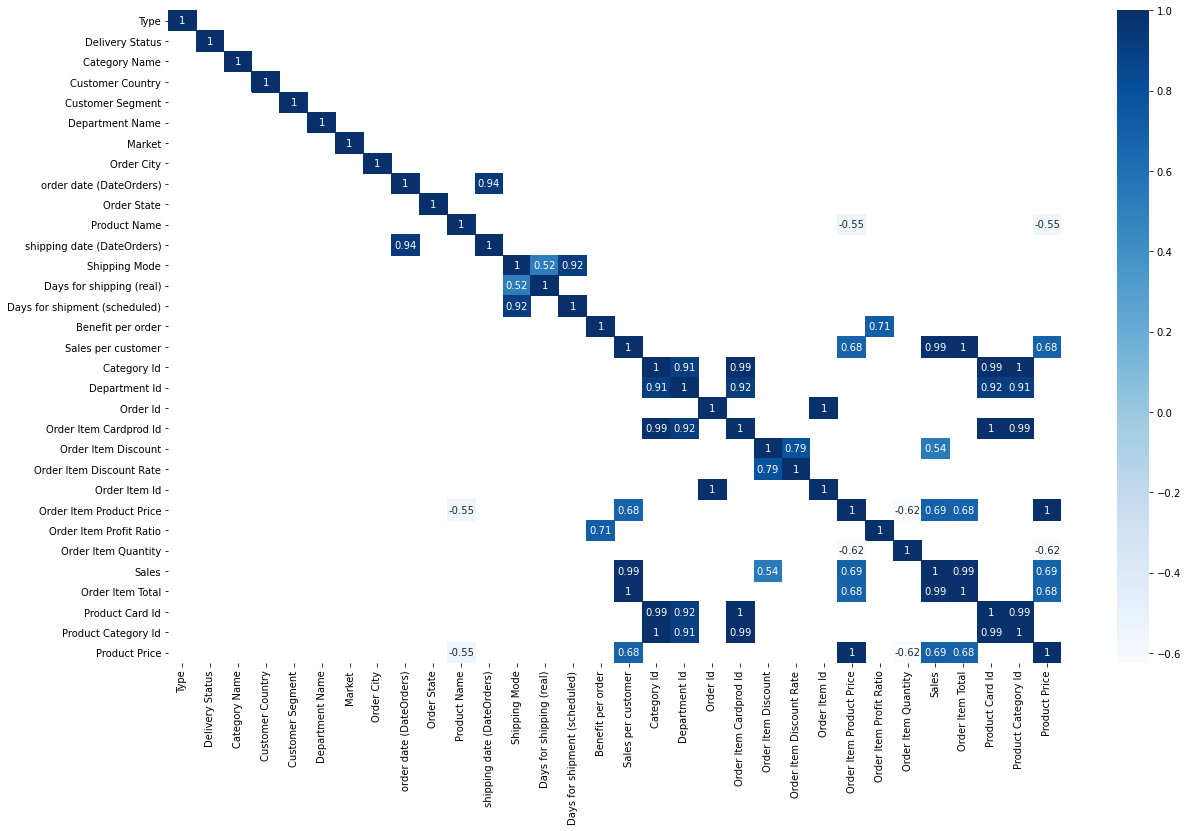

In [66]:
sns.heatmap(X.corr()[np.abs(X.corr())>0.5], annot = True,cmap= 'Blues')  # 2nd assumption passed.
# if we compare the no.of features, multicollinearity is less

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =48) # Train:Test = 70:30

In [69]:
# Ascertaing through statistical test that train & test data represent the overall data

# Ho: train and test set are reprentative of the overall data.
# Ha: train and test set are not reprentative of the overall data.

In [70]:
stats.ttest_ind(y_train,y_test)

Ttest_indResult(statistic=0.2980565264343673, pvalue=0.7656603642388153)

In [71]:
# Since p-value > 0.05, Accepting Ho.

In [72]:
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

126363
54156
126363
54156


# Base Model

In [73]:
import statsmodels.api as sm

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,roc_auc_score,classification_report,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [101]:
model = LogisticRegression(random_state=48).fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     52946
           6       0.00      0.00      0.00      1210

    accuracy                           0.98     54156
   macro avg       0.49      0.50      0.49     54156
weighted avg       0.96      0.98      0.97     54156

[[52946     0]
 [ 1210     0]]


In [102]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[52946     0]
 [ 1210     0]]


0.9776571386365315

In [96]:
y_train = y_train.astype(int)

In [98]:
y_test = y_test.astype(int)

In [99]:
y_train.unique()

array([0, 6])

In [110]:
y_train = y_train.reset_index(drop=True)

In [111]:
for i in range(1, len(y_train)):
    if y_train[i]==6:
        y_train[i]=1

In [113]:
y_test = y_test.reset_index(drop=True)

In [114]:
for i in range(1, len(y_test)):
    if y_test[i]==6:
        y_test[i]=1

In [117]:
def model_eval(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    y_train_pred = algo.predict(xtrain)
    y_train_prob = algo.predict_proba(xtrain)[:,1]

    print('confusion matrix - train : \n',confusion_matrix(ytrain,y_train_pred))
    print('Accuracy of the train data: ',accuracy_score(ytrain,y_train_pred))
    print('Area under the curve AUC on the train : ',roc_auc_score(ytrain,y_train_prob))
    print('\n')
    algo.fit(xtest,ytest)
    y_test_pred = algo.predict(xtest)
    y_test_prob = algo.predict_proba(xtest)[:,1]

    print('confusion matrix - test : \n',confusion_matrix(ytest,y_test_pred))
    print('Accuracy of the test data: ',accuracy_score(ytest,y_test_pred))
    print('Area under the curve AUC on the test : ',roc_auc_score(ytest,y_test_prob))
    print('\n')

    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    plt.figure(figsize=(10,7))
    plt.plot(fpr,tpr, label = 'test')
    plt.plot(fpr,fpr,'r',label = 'train')
    plt.legend()
    plt.show()

confusion matrix - train : 
 [[123511      0]
 [  2852      0]]
Accuracy of the train data:  0.9774301021659821
Area under the curve AUC on the train :  0.9461652960415097


confusion matrix - test : 
 [[52946     0]
 [ 1210     0]]
Accuracy of the test data:  0.9776571386365315
Area under the curve AUC on the test :  0.946080647271054




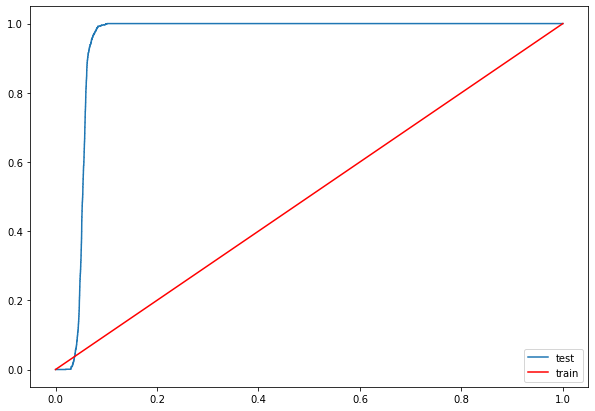

In [118]:
model_eval(classifier,X_train, X_test, y_train, y_test)